##  Performing complete Data analysis on Uber's customer in Ney-york city 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
files=os.listdir(r'C:\Users\acer\Downloads\Projects\Uber analysis in NY\uber-pickups-in-new-york-city')[-7:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [3]:
files.remove('uber-raw-data-janjune-15.csv')

In [4]:
path=r'C:\Users\acer\Downloads\Projects\Uber analysis in NY\uber-pickups-in-new-york-city'
final=pd.DataFrame()
for file in files:
    df=pd.read_csv(path + "/" +  file,encoding='utf-8')
    final=pd.concat([df,final])
                

In [5]:
final.shape

(4534327, 4)

In [6]:
final

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


## Data Preparation

 Lat : The latitude of the Uber pickup
     Lon : The longitude of the Uber pickup
      Base : The TLC base company code affiliated with the Uber pickup
      The globe is split into an imaginary 360 sections from both top to bottom (north to south) and 180 sections from side to       side (west to east). The sections running from top to bottom on a globe are called longitude, and the sections running         from  side to side on a globe are called latitude.
     Latitude is the measurement of distance north or south of the Equator.
     Every location on earth has a global address. Because the address is in numbers, people can communicate about location no      matter what language they might speak. A global address is given as two numbers called coordinates. The two numbers are a      location's latitude number and its longitude number ("Lat/Long").

In [11]:
df=final.copy()

In [12]:
df

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [44]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
month        0
hour         0
minute       0
day          0
weekday      0
dtype: int64

In [13]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [14]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [15]:
df['month']=df['Date/Time'].dt.month

In [17]:
df['hour']=df['Date/Time'].dt.hour

In [18]:
df['minute']=df['Date/Time'].dt.minute

In [19]:
df['year']=df['Date/Time'].dt.year

In [20]:
df['day']=df['Date/Time'].dt.day

In [23]:
df.drop(['year'],axis=1,inplace=True)

In [28]:
df['weekday']=df['Date/Time'].dt.day_name()

In [29]:
df

,Date/Time,Lat,Lon,Base,month,hour,minute,day,weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,9,0,1,1,Monday
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,9,0,1,1,Monday
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,9,0,3,1,Monday
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,9,0,6,1,Monday
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,9,0,11,1,Monday
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,4,23,22,30,Wednesday
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,4,23,26,30,Wednesday
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,4,23,31,30,Wednesday
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,4,23,32,30,Wednesday


In [33]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [34]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [35]:
df['weekday'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

### Analysis of journey by Week-days

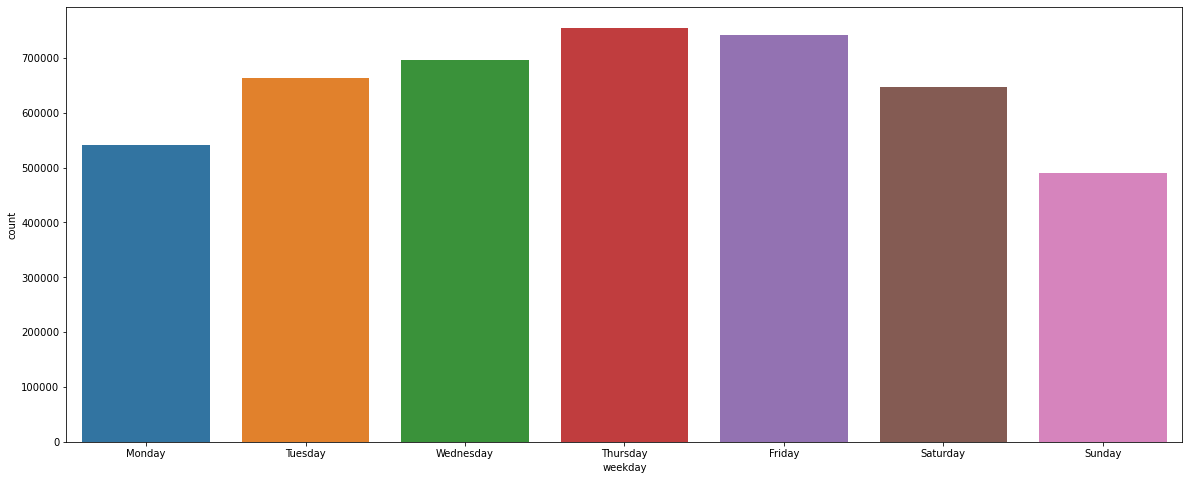

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['weekday'],data=df)

### Mid-weekdays shows high amount customers comparitively with weekends

### Analysis of weekdays rush month-wise

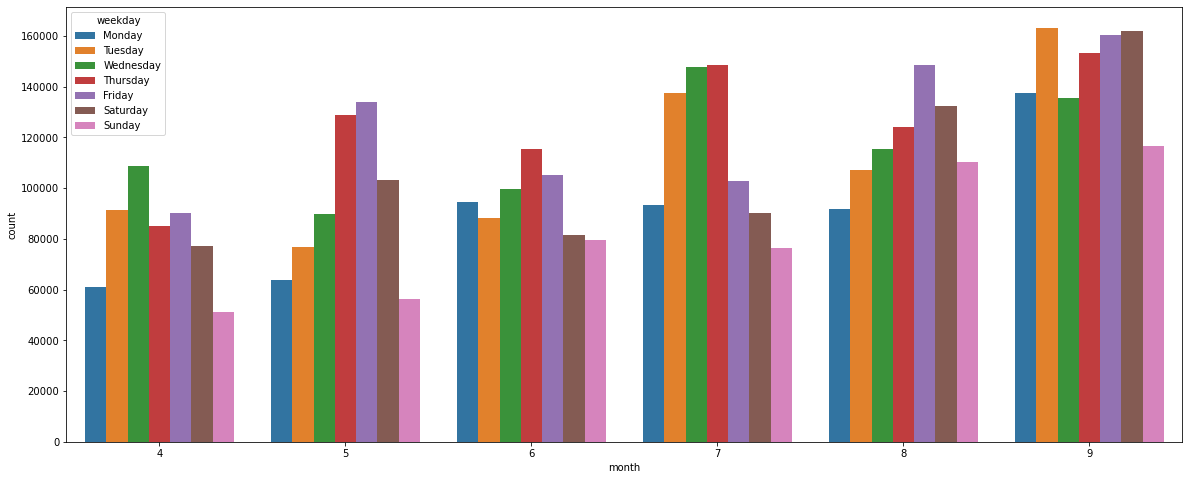

In [48]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['month'],data=df,hue=df['weekday'])

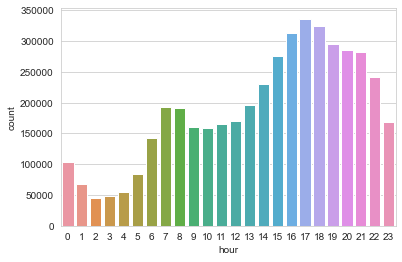

In [219]:
sns.countplot(x=df['hour'],data=df)

### Interestingly, after the morning rush, the number of Uber pickups doesn't dip much throughout the rest of the morning and early afternoon. There is significantly more demand in the evening than the daytime

### It peaks during evening time when people are logging off from work

### Evening hours of mid-weekdays show high amount of customers ,so we should give some discounts to frequent customers during the peak hour 

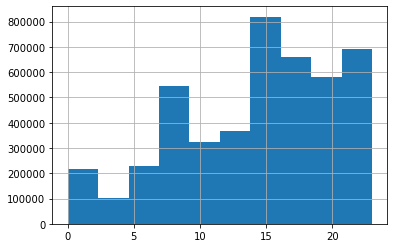

In [76]:
df.hour.hist()

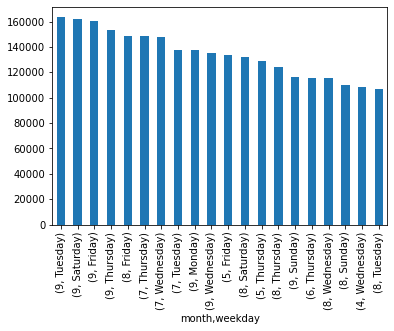

In [102]:
df.groupby(by=['month','weekday'])['hour'].count().nlargest(20).plot(kind='bar')

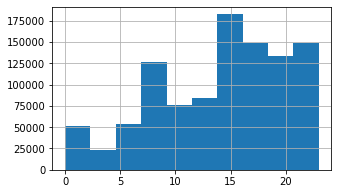

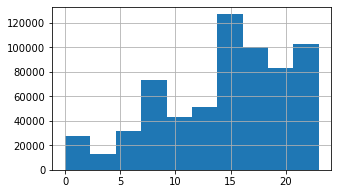

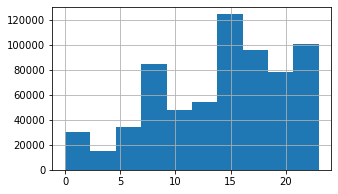

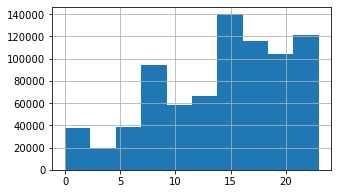

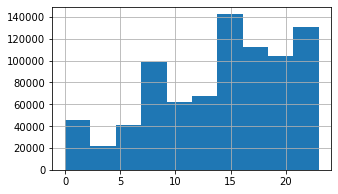

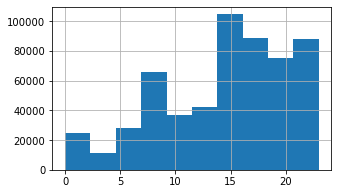

In [57]:
for i in df['month'].unique():
    plt.figure(figsize=(5,3))
    df[df['month']==i]['hour'].hist()

### Monthy analysis

In [79]:
import plotly
import plotly.graph_objs as go
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs

In [100]:
graph=go.Bar(x=df.groupby('month')['hour'].count().index,y=df.groupby('month')['hour'].count())

## September has a maximum rush

In [101]:
iplot([graph])

### Last day of the month registers maximum journey

[]

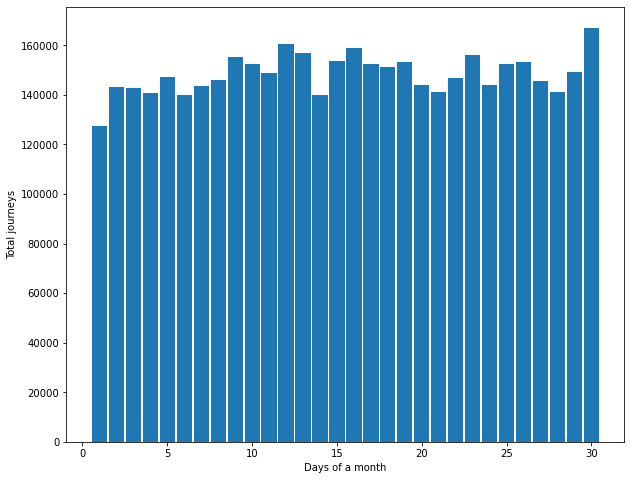

In [107]:
plt.figure(figsize=(10,8))
plt.hist(df['day'],bins=30,rwidth=0.9,range=(0.5,30.5))
plt.xlabel('Days of a month')
plt.ylabel('Total journeys')
plt.plot()

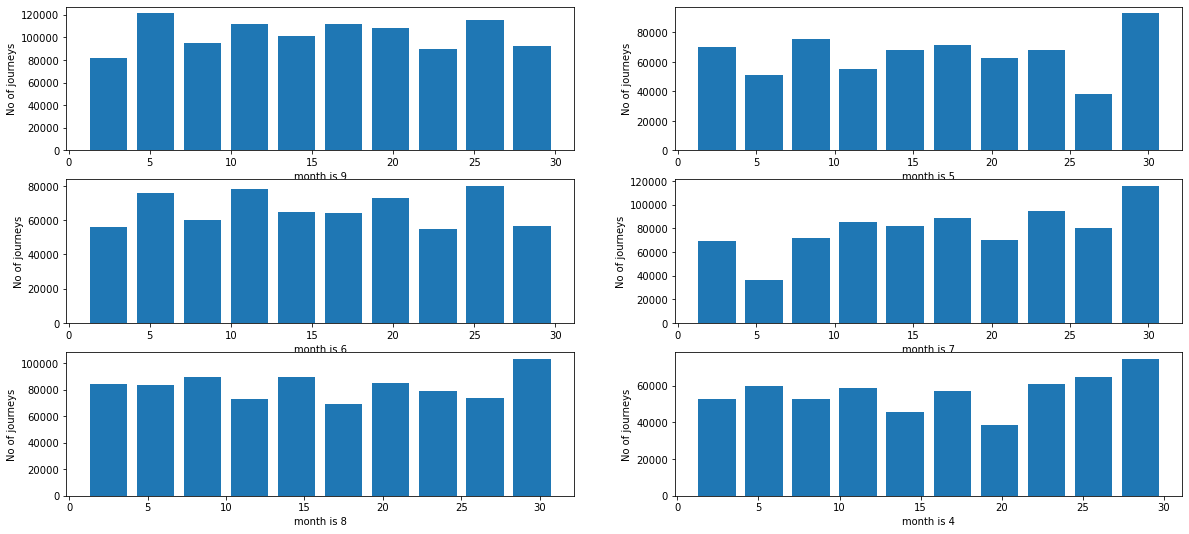

In [118]:
plt.figure(figsize=(20,9))
for index,month in enumerate(df['month'].unique(),1):
    plt.subplot(3,2,index)
    df_out=df[df['month']==month]
    plt.hist(df_out['day'],rwidth=0.8)
    plt.xlabel('month is {}'.format(month))
    plt.ylabel('No of journeys')
    

### Getting rush in a hour

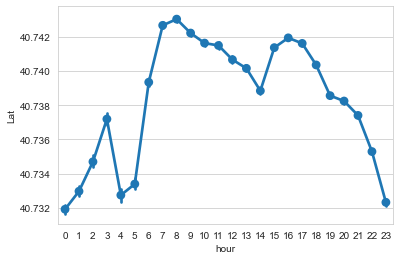

In [121]:
sns.set_style("whitegrid")
sns.pointplot(x='hour',y='Lat',data=df)

In [144]:
grp=df.groupby(['Base','month'])['Date/Time'].count().reset_index()

### To analyse which base number gets popular by month name

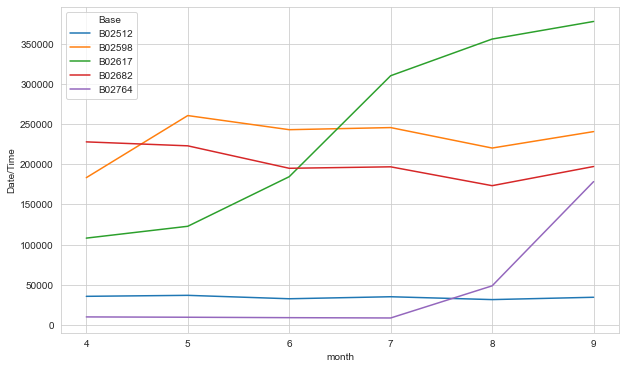

In [146]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month',y='Date/Time',hue='Base',data=grp)